### Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import random
import os
import shutil
import glob

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Collection & Preparing

In [2]:
os.chdir('E:\\DataScience\\Phyton\\DeepLearning\\deeplizard\\keras with tensorflow\\dogs-vs-cats\\dataset')
if os.path.isdir('train/cat') is False:
    os.makedirs('train/cat')
    os.makedirs('train/dog')
    os.makedirs('val/cat')
    os.makedirs('val/dog')
    os.makedirs('test/cat')
    os.makedirs('test/dog')
    
    for i in random.sample(glob.glob('cat*'),3000):
        shutil.move(i, 'train/cat')
        
    for i in random.sample(glob.glob('dog*'),3000):
        shutil.move(i, 'train/dog')
        
    for i in random.sample(glob.glob('cat*'),500):
        shutil.move(i, 'val/cat')
        
    for i in random.sample(glob.glob('dog*'),500):
        shutil.move(i, 'val/dog')
        
    for i in random.sample(glob.glob('cat*'),300):
        shutil.move(i, 'test/cat')
                    
    for i in random.sample(glob.glob('dog*'),300):
        shutil.move(i, 'test/dog')
                    

### Device Check: CPU & GPU

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### For running in GPU

physical_devices = tf.config.experimental.list_physical_devices('GPU')

print("Num GPUs Available: ", len(physical_devices))

tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Assigning Directories

In [4]:
train_path = 'E:\\DataScience\\Phyton\\DeepLearning\\deeplizard\\keras with tensorflow\\dogs-vs-cats\\dataset\\train'
val_path = 'E:\\DataScience\\Phyton\\DeepLearning\\deeplizard\\keras with tensorflow\\dogs-vs-cats\\dataset\\val'
test_path = 'E:\\DataScience\\Phyton\\DeepLearning\\deeplizard\\keras with tensorflow\\dogs-vs-cats\\dataset\\test'

### Image Preprocesssing

In [5]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size=10)

val_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = val_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size=10, shuffle=False)

# If test labels are not known
#test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
#    .flow_from_directory(directory = test_path, target_size = (224,224), classes = None, class_mode =None,
#                        batch_size=10, shuffle=False)

Found 6000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [6]:
assert train_batches.n == 6000
assert val_batches.n == 1000
assert test_batches.n == 600
assert train_batches.num_classes == val_batches.num_classes == test_batches.num_classes == 2

### Visualize the Data

In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10, figsize = (20,20))
    axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

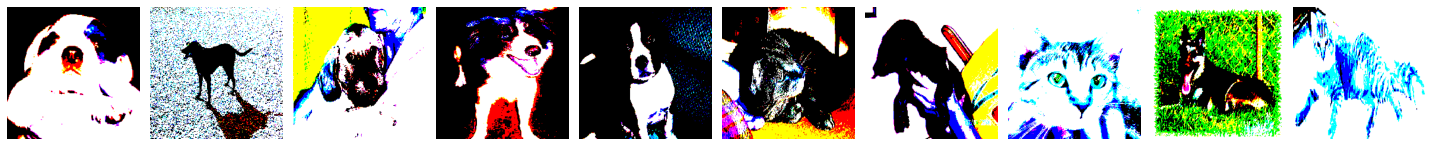

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [9]:
plotImages(imgs)
print(labels)

### CNN Model

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 200706    
Total params: 210,850
Trainable params: 210,850
Non-trainable params: 0
__________________________________________________

### Model Training

In [12]:
model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
%%time
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches)/6,
    validation_data=val_batches,
    validation_steps=len(val_batches)/6,
    epochs=12,
    verbose=2
)

Epoch 1/12
100/100 - 38s - loss: 10.9899 - accuracy: 0.5560 - val_loss: 11.4673 - val_accuracy: 0.5176
Epoch 2/12
100/100 - 36s - loss: 3.7047 - accuracy: 0.6160 - val_loss: 2.4775 - val_accuracy: 0.6294
Epoch 3/12
100/100 - 36s - loss: 1.7898 - accuracy: 0.6610 - val_loss: 1.4657 - val_accuracy: 0.6588
Epoch 4/12
100/100 - 35s - loss: 1.3197 - accuracy: 0.7020 - val_loss: 1.4533 - val_accuracy: 0.6529
Epoch 5/12
100/100 - 37s - loss: 0.9968 - accuracy: 0.7030 - val_loss: 1.3711 - val_accuracy: 0.6118
Epoch 6/12
100/100 - 37s - loss: 0.7232 - accuracy: 0.7620 - val_loss: 0.9592 - val_accuracy: 0.6706
Epoch 7/12
100/100 - 37s - loss: 0.6275 - accuracy: 0.7850 - val_loss: 1.0886 - val_accuracy: 0.6647
Epoch 8/12
100/100 - 34s - loss: 0.4877 - accuracy: 0.8240 - val_loss: 0.8292 - val_accuracy: 0.6765
Epoch 9/12
100/100 - 37s - loss: 0.4776 - accuracy: 0.8350 - val_loss: 1.1034 - val_accuracy: 0.6588
Epoch 10/12
100/100 - 37s - loss: 0.3901 - accuracy: 0.8640 - val_loss: 0.9282 - val_accu

### Preparing for Test

In [14]:
test_images, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

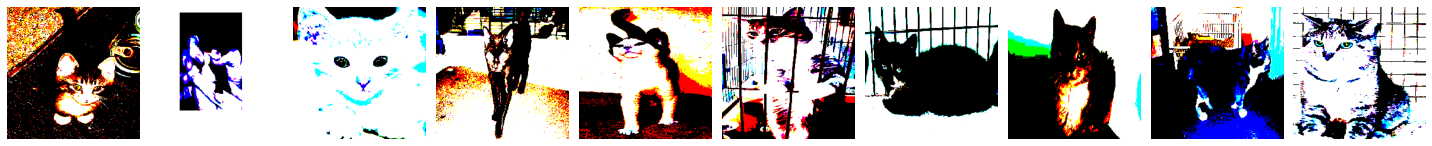

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
plotImages(test_images)
print(test_labels)

### CNN Model Predictions

In [16]:
predictions = model.predict(x=test_batches, steps= len(test_batches), verbose = 0)

In [17]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Confusion Matrix

In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(predictions, axis =-1))

<AxesSubplot:>

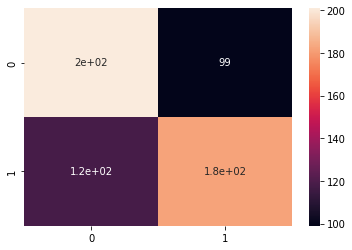

In [19]:
sns.heatmap(cm, annot = True)

In [20]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [22]:
cm_plot_labels = ['cats','dogs']

Confusion matrix, without normalization
[[201  99]
 [118 182]]


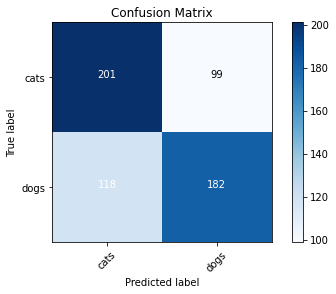

In [23]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Tranfer Learning

## Using a fine tuned Model: VGG16

In [24]:
vgg_model = tf.keras.applications.vgg16.VGG16()

In [25]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
type(vgg_model)

tensorflow.python.keras.engine.functional.Functional

##### Functional Model

In [27]:
x = vgg_model.layers[-2].output
output = Dense(units=2, activation='softmax')(x)
model = tf.keras.Model(inputs=vgg_model.input, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

##### Sequential Model from Functional Model

In [28]:
model = Sequential()

for layer in vgg_model.layers[:-1]:
   model.add(layer)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

##### Non Trainable Layers

In [29]:
for layer in model.layers:
    layer.trainable = False

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

##### Adding Trainable last Dense Layer with 2 Class

In [31]:
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Model Training

In [32]:
model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [33]:
%%time
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches)/20,
    validation_data=val_batches,
    validation_steps=len(val_batches)/20,
    epochs=5,
    verbose=2
)

Epoch 1/5
30/30 - 54s - loss: 0.6546 - accuracy: 0.7100 - val_loss: 0.3535 - val_accuracy: 0.8400
Epoch 2/5
30/30 - 61s - loss: 0.2514 - accuracy: 0.9000 - val_loss: 0.2307 - val_accuracy: 0.9400
Epoch 3/5
30/30 - 55s - loss: 0.1099 - accuracy: 0.9600 - val_loss: 0.2635 - val_accuracy: 0.9200
Epoch 4/5
30/30 - 53s - loss: 0.1103 - accuracy: 0.9667 - val_loss: 0.1509 - val_accuracy: 0.9800
Epoch 5/5
30/30 - 53s - loss: 0.1120 - accuracy: 0.9533 - val_loss: 0.2011 - val_accuracy: 0.9400
Wall time: 4min 46s


### CNN Model Predictions

In [34]:
predictions = model.predict(x=test_batches, steps= len(test_batches), verbose = 0)

In [35]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Confusion Matrix

In [36]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(predictions, axis =-1))

<AxesSubplot:>

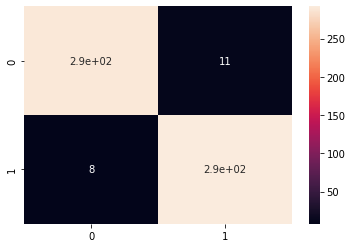

In [37]:
sns.heatmap(cm, annot = True)

In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [40]:
cm_plot_labels = ['cats','dogs']

Confusion matrix, without normalization
[[289  11]
 [  8 292]]


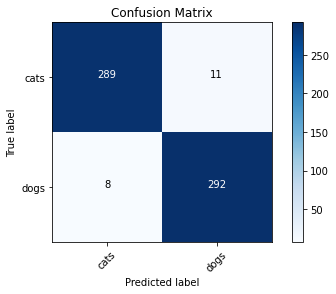

In [41]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Data Agumentation

aug_iter = gen.flow(image, save_to_dir='data/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')